**Data preprocessing & Apply Machine Learning Techniques**





---

**Data Preprocessing**

---

1.import real dataset & dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
df= pd.read_csv('fake_currency_data.csv')
df

,Country,Denomination,Counterfeit,SerialNumber,SecurityFeatures,Weight,Length,Width,Thickness
0,USA,$100,1,25973198,Hologram,1.731759,130.243185,66.537999,0.098488
1,USA,$20,1,95903230,Security Thread,1.002179,152.596364,76.135834,0.094119
2,EU,€10,0,82937914,Hologram,2.306713,152.857126,66.772442,0.061393
3,USA,€20,1,23612989,Microprint,1.366965,143.133672,78.377052,0.053114
4,EU,€20,1,56025342,Watermark,1.796075,129.664777,75.916093,0.051438
...,...,...,...,...,...,...,...,...,...
999995,EU,$100,1,24436622,Watermark,1.472511,134.888731,75.425943,0.093939
999996,EU,£20,1,82654212,Hologram,2.355633,147.830149,65.232274,0.097358
999997,USA,$5,0,59174754,Microprint,1.393764,150.050308,69.273269,0.068363
999998,EU,£10,0,55268089,Watermark,2.026417,142.852137,77.878841,0.081160


2.remove the missing values from datasets


*   here no-null values in datasets



In [4]:
df.isnull().sum()

Country             0
Denomination        0
Counterfeit         0
SerialNumber        0
SecurityFeatures    0
Weight              0
Length              0
Width               0
Thickness           0
dtype: int64

3.Adding new features from existing features
*   Area=length x width
*   volume=length x width x thickness
*   Aspect_ratio=length / width
*   weight_to_Area_ratio= weight / Area
*   weight_to_volume_ratio= weigth / volume







In [5]:
df['Area'] = df['Length'] * df['Width']
df['Volume'] = df['Length'] * df['Width'] * df['Thickness']
df['Aspect_Ratio'] = df['Length'] / df['Width']
df['Weight_to_Area_Ratio'] = df['Weight'] / df['Area']
df['Weight_to_Volume_Ratio'] = df['Weight'] / df['Volume']

4.Remove the unnecessary & not depending for results columns

*   serial_number is not depending the results because it has unigue identifier



In [6]:
df = df.drop(['SerialNumber'], axis=1)
df

,Country,Denomination,Counterfeit,SecurityFeatures,Weight,Length,Width,Thickness,Area,Volume,Aspect_Ratio,Weight_to_Area_Ratio,Weight_to_Volume_Ratio
0,USA,$100,1,Hologram,1.731759,130.243185,66.537999,0.098488,8666.120975,853.511671,1.957426,0.000200,0.002029
1,USA,$20,1,Security Thread,1.002179,152.596364,76.135834,0.094119,11618.051441,1093.479679,2.004265,0.000086,0.000917
2,EU,€10,0,Hologram,2.306713,152.857126,66.772442,0.061393,10206.643517,626.613051,2.289225,0.000226,0.003681
3,USA,€20,1,Microprint,1.366965,143.133672,78.377052,0.053114,11218.395270,595.855958,1.826219,0.000122,0.002294
4,EU,€20,1,Watermark,1.796075,129.664777,75.916093,0.051438,9843.643273,506.339912,1.708001,0.000182,0.003547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,EU,$100,1,Watermark,1.472511,134.888731,75.425943,0.093939,10174.109805,955.750386,1.788360,0.000145,0.001541
999996,EU,£20,1,Hologram,2.355633,147.830149,65.232274,0.097358,9643.296759,938.849687,2.266212,0.000244,0.002509
999997,USA,$5,0,Microprint,1.393764,150.050308,69.273269,0.068363,10394.475278,710.601323,2.166064,0.000134,0.001961
999998,EU,£10,0,Watermark,2.026417,142.852137,77.878841,0.081160,11125.158811,902.916747,1.834287,0.000182,0.002244


5.Datasets cleaning for uniformly distrubated dataset
*   this datastets are uniformly distrubted.that why i remove some counterfeits notes.
*   only 5% of counterfeits notes are presents in new datasets
*   this 5% note are equally country,denomination and seacurity features by counterfeits.




In [7]:
# create a new dataset only 5% counterfeit present and all non counterfeit present in df.in sample country,denomination and seacurity features by counterfeit percentage also 5,5,5% and over all 5% in datasets

# Separate counterfeit and non-counterfeit data
counterfeit = df[df['Counterfeit'] == 1]
non_counterfeit = df[df['Counterfeit'] == 0]

# Sample 5% of counterfeit data
counterfeit_sample = counterfeit.sample(frac=0.05)

# Combine sampled counterfeit data with all non-counterfeit data
new_df = pd.concat([counterfeit_sample, non_counterfeit])

# Shuffle the new dataset
new_df = new_df.sample(frac=1).reset_index(drop=True)

# Update the country, denomination, and security features by 5%
new_df['Country'] = new_df['Country'].apply(lambda x: 'other' if np.random.random() < 0.05 else x)
new_df['Denomination'] = new_df['Denomination'].apply(lambda x: 100 if np.random.random() < 0.05 else x)
new_df['SecurityFeatures'] = new_df['SecurityFeatures'].apply(lambda x: 'high' if np.random.random() < 0.05 else x)

# Print the new dataset
new_df


,Country,Denomination,Counterfeit,SecurityFeatures,Weight,Length,Width,Thickness,Area,Volume,Aspect_Ratio,Weight_to_Area_Ratio,Weight_to_Volume_Ratio
0,USA,£5,0,Microprint,1.951739,120.342934,76.342520,0.099082,9187.282800,910.292480,1.576355,0.000212,0.002144
1,EU,€10,0,Security Thread,1.973224,143.249467,78.939662,0.067950,11308.064435,768.384908,1.814670,0.000174,0.002568
2,EU,$100,0,Hologram,1.375517,127.144896,63.188832,0.083753,8034.137481,672.882234,2.012142,0.000171,0.002044
3,UK,$5,0,Watermark,1.576948,124.839820,68.335544,0.056304,8530.996979,480.332534,1.826865,0.000185,0.003283
4,UK,100,0,Hologram,0.987226,136.402692,77.702892,0.090591,10598.883658,960.161630,1.755439,0.000093,0.001028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525574,USA,100,0,Microprint,2.464214,159.134403,66.011519,0.089326,10504.703588,938.340540,2.410707,0.000235,0.002626
525575,EU,$20,0,Security Thread,1.223090,137.254132,78.175685,0.053399,10729.935732,572.964435,1.755714,0.000114,0.002135
525576,USA,$100,0,Security Thread,1.220706,145.120703,68.195325,0.058913,9896.553425,583.031356,2.128015,0.000123,0.002094
525577,other,$5,0,Security Thread,1.814900,126.424226,76.442372,0.072203,9664.167667,697.781986,1.653850,0.000188,0.002601


6.Encoding for the categorical featurs


*   here used **one hot encoding** for country,denomination and seacurity features



In [8]:
# one hot encoding for Country	Denomination and SecurityFeatures

new_df = pd.get_dummies(new_df, columns=['Country', 'Denomination', 'SecurityFeatures'], dtype=int)
new_df


,Counterfeit,Weight,Length,Width,Thickness,Area,Volume,Aspect_Ratio,Weight_to_Area_Ratio,Weight_to_Volume_Ratio,...,Denomination_£20,Denomination_£5,Denomination_€10,Denomination_€20,Denomination_€5,SecurityFeatures_Hologram,SecurityFeatures_Microprint,SecurityFeatures_Security Thread,SecurityFeatures_Watermark,SecurityFeatures_high
0,0,1.951739,120.342934,76.342520,0.099082,9187.282800,910.292480,1.576355,0.000212,0.002144,...,0,1,0,0,0,0,1,0,0,0
1,0,1.973224,143.249467,78.939662,0.067950,11308.064435,768.384908,1.814670,0.000174,0.002568,...,0,0,1,0,0,0,0,1,0,0
2,0,1.375517,127.144896,63.188832,0.083753,8034.137481,672.882234,2.012142,0.000171,0.002044,...,0,0,0,0,0,1,0,0,0,0
3,0,1.576948,124.839820,68.335544,0.056304,8530.996979,480.332534,1.826865,0.000185,0.003283,...,0,0,0,0,0,0,0,0,1,0
4,0,0.987226,136.402692,77.702892,0.090591,10598.883658,960.161630,1.755439,0.000093,0.001028,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525574,0,2.464214,159.134403,66.011519,0.089326,10504.703588,938.340540,2.410707,0.000235,0.002626,...,0,0,0,0,0,0,1,0,0,0
525575,0,1.223090,137.254132,78.175685,0.053399,10729.935732,572.964435,1.755714,0.000114,0.002135,...,0,0,0,0,0,0,0,1,0,0
525576,0,1.220706,145.120703,68.195325,0.058913,9896.553425,583.031356,2.128015,0.000123,0.002094,...,0,0,0,0,0,0,0,1,0,0
525577,0,1.814900,126.424226,76.442372,0.072203,9664.167667,697.781986,1.653850,0.000188,0.002601,...,0,0,0,0,0,0,0,1,0,0


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525579 entries, 0 to 525578
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Counterfeit                       525579 non-null  int64  
 1   Weight                            525579 non-null  float64
 2   Length                            525579 non-null  float64
 3   Width                             525579 non-null  float64
 4   Thickness                         525579 non-null  float64
 5   Area                              525579 non-null  float64
 6   Volume                            525579 non-null  float64
 7   Aspect_Ratio                      525579 non-null  float64
 8   Weight_to_Area_Ratio              525579 non-null  float64
 9   Weight_to_Volume_Ratio            525579 non-null  float64
 10  Country_EU                        525579 non-null  int64  
 11  Country_UK                        525579 non-null  i

7.Normalization techniques for the numerical features as well as encoding catogirical

*  here **standarscaler** use for all columns

In [10]:
# all colums transforms to standard scaler except counterfeit

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns except for 'Counterfeit'
scaler.fit(new_df.drop('Counterfeit', axis=1))

# Transform the numerical columns except for 'Counterfeit'
new_df[new_df.columns.difference(['Counterfeit'])] = scaler.transform(new_df.drop('Counterfeit', axis=1))

# Print the transformed dataset
new_df


,Counterfeit,Weight,Length,Width,Thickness,Area,Volume,Aspect_Ratio,Weight_to_Area_Ratio,Weight_to_Volume_Ratio,...,Denomination_£20,Denomination_£5,Denomination_€10,Denomination_€20,Denomination_€5,SecurityFeatures_Hologram,SecurityFeatures_Microprint,SecurityFeatures_Security Thread,SecurityFeatures_Watermark,SecurityFeatures_high
0,0,1.795804,-0.293699,-0.231928,-0.29399,0.615146,-0.559029,-1.705913,-0.558642,-0.556264,...,-0.293168,-0.292666,-0.294372,-0.292946,-0.292766,-0.293317,-0.293302,3.414314,-0.292643,-0.293221
1,0,-0.556854,-0.293699,-0.231928,-0.29399,0.658942,-0.559029,0.278170,1.790055,-0.556264,...,-0.293168,-0.292666,-0.294372,-0.292946,-0.292766,-0.293317,-0.293302,-0.292885,3.417129,-0.293221
2,0,-0.556854,-0.293699,-0.231928,-0.29399,-0.559471,1.788816,-1.116751,-0.558642,-0.556264,...,-0.293168,-0.292666,3.397066,-0.292946,-0.292766,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221
3,0,-0.556854,-0.293699,-0.231928,-0.29399,-0.148857,-0.559029,-1.316409,-0.558642,1.797707,...,-0.293168,-0.292666,-0.294372,-0.292946,3.415698,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221
4,0,-0.556854,-0.293699,-0.231928,-0.29399,-1.350992,1.788816,-0.314874,-0.558642,-0.556264,...,-0.293168,-0.292666,-0.294372,-0.292946,-0.292766,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525574,0,1.795804,-0.293699,-0.231928,-0.29399,1.659815,-0.559029,1.654067,-0.558642,-0.556264,...,-0.293168,-0.292666,-0.294372,-0.292946,-0.292766,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221
525575,0,-0.556854,-0.293699,-0.231928,-0.29399,-0.870189,-0.559029,-0.241125,1.790055,-0.556264,...,-0.293168,-0.292666,-0.294372,3.413600,-0.292766,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221
525576,0,-0.556854,-0.293699,-0.231928,-0.29399,-0.875048,-0.559029,0.440250,1.790055,-0.556264,...,-0.293168,-0.292666,3.397066,-0.292946,-0.292766,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221
525577,0,-0.556854,-0.293699,-0.231928,-0.29399,0.336202,-0.559029,-1.179173,1.790055,-0.556264,...,-0.293168,-0.292666,-0.294372,-0.292946,3.415698,-0.293317,-0.293302,-0.292885,-0.292643,-0.293221


In [11]:
new_df['Country_EU']

0         1.098806
1         1.548682
2        -1.179670
3        -0.288159
4         1.334449
            ...   
525574   -0.690726
525575    1.416346
525576   -0.312448
525577    1.116102
525578    0.733790
Name: Country_EU, Length: 525579, dtype: float64

8.Dimensions reduction for scaled data

*   here 31 colums used are in training which lots of time taken to traing that why used in dimension reduction techniques



In [12]:
# dimension reduction for all colums except counterfeit colums

from sklearn.decomposition import PCA

# Create a PCA instance with 20 components
pca = PCA(n_components=20)

# Fit the PCA instance to the scaled data
new_df_reduced = pca.fit_transform(new_df.drop('Counterfeit', axis=1))

# Convert the reduced data back to a DataFrame
new_df_reduced = pd.DataFrame(new_df_reduced, columns=[f"PC{i+1}" for i in range(20)])

# Print the reduced data
new_df_reduced


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.071473,-2.779175,0.810168,-2.147168,-0.624003,1.607269,-0.207548,1.442548,-1.394251,0.411013,-0.519035,-0.207347,-0.226248,-0.441571,0.488526,-1.715070,-1.488056,-1.916323,-1.538386,-0.526344
1,-0.551810,-1.322070,1.295156,1.437781,-1.208118,-1.209345,-1.510702,-1.379438,-0.211739,-0.975731,1.351082,-0.878869,0.314078,0.253568,0.295565,1.957009,-0.601613,-0.153349,-1.669261,1.153080
2,0.777361,0.108055,-1.571103,-1.681333,-1.125946,-1.346702,1.772576,-0.948061,-0.144240,-2.047952,0.728222,2.693093,0.035474,-0.133591,-0.112353,-0.669867,-0.009138,0.018687,0.250411,-0.036766
3,2.279677,-0.976669,-1.509885,0.604846,1.742494,-0.374048,-0.182807,0.884069,1.800660,0.558796,0.532218,-0.296423,-0.034036,-0.212016,0.102997,-0.772651,-1.151315,2.924304,-0.429015,-0.943605
4,-3.058643,-1.575388,-0.495288,-0.604619,1.743375,-0.383214,1.771362,-0.916322,-0.256295,-0.074790,-0.058418,-0.009377,-0.004817,-0.011229,0.010104,0.023343,-0.004288,0.016893,-0.033460,0.004711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525574,0.012879,2.170762,2.780677,-0.770017,-0.616550,1.616295,-0.151643,1.450816,-1.440108,-0.102815,-0.117519,-0.005729,0.006241,-0.000340,-0.012453,-0.000311,0.002970,-0.015325,0.021652,-0.022465
525575,-0.708596,-1.533118,-1.161928,2.211188,-1.131349,-1.185890,-1.472503,-1.409947,-0.172510,-0.096745,0.349121,-0.489940,-0.202428,-0.489395,0.280065,1.257787,-1.462437,-0.872043,2.481595,-1.201243
525576,-0.240707,0.805940,-1.394542,1.223429,-0.543476,1.757775,-1.438491,-1.323689,-0.193166,-2.026014,0.686262,2.697603,0.016554,-0.097357,-0.114550,-0.677566,0.002921,0.015216,0.276295,-0.015074
525577,0.558330,-2.217285,0.036853,0.097417,-0.024370,0.061467,-1.526770,-1.388498,-0.243656,2.028205,0.607206,-0.165833,-0.002364,-0.253958,0.105455,-0.983367,-1.180678,3.002475,-0.360482,-0.915594


9.scatter plot between components

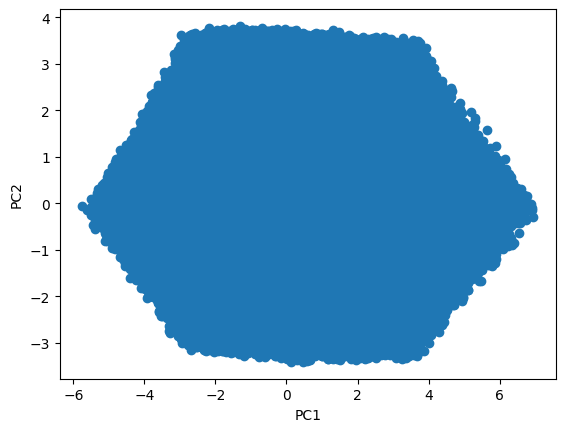

In [13]:
# create scatter plot pc1 vs pc2

import matplotlib.pyplot as plt

# Create a scatter plot of PC1 vs PC2
plt.scatter(new_df_reduced['PC1'], new_df_reduced['PC2'])

# Label the axes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


---

**Apply Machine Learning Techniques**

---

**A.supervised learning**

1.Logistics regression
*   accuracy:95.25%






In [14]:
#logistic regression

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(new_df_reduced, new_df['Counterfeit'], test_size=0.2, random_state=42)

# # Train a Logistic Regression model
# model_logistic = LogisticRegression()
# model_logistic.fit(X_train, y_train)

# # Evaluate the model on the test set
# y_pred = model_logistic.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")


2.DecisionTreeClassifier
*   accuracy:90.04%






In [15]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(new_df_reduced, new_df['Counterfeit'], test_size=0.2, random_state=42)

# # Train a decision tree classifier
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)

# # Evaluate the classifier on the test set
# score = clf.score(X_test, y_test)

# # Print the accuracy score
# print("Accuracy:", score)

3.Random forest
*   acurracy:95.19%






In [16]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # Separate features and target
# X = new_df_reduced
# y = new_df['Counterfeit']

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a classifier
# classifier = RandomForestClassifier()
# classifier.fit(X_train, y_train)

# # Evaluate the classifier on the test set
# y_pred = classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

4.Support vector machine


*   accuracy:



In [17]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(new_df_reduced, new_df['Counterfeit'], test_size=0.2, random_state=42)

# # Train a support vector machine model
# model = SVC()
# model.fit(X_train, y_train)

# # Evaluate the model on the test set
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


**B.unsupervised learning**

1.k-means culstering

*   visulize the how cluster look like
*   increse the value of k cluster not differences
*   in elbow plot k=2 and k=3 are points which effectively work this techniques
*   highest at k=2 accuracy is 54.05% (note:in unsupervised learning it doesnt means label)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


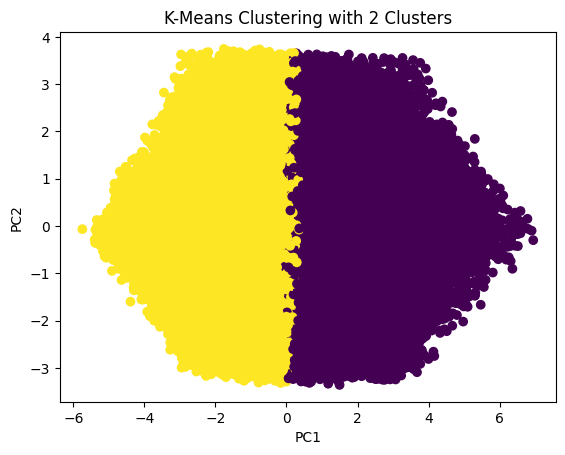

In [18]:
# Apply k-means clustering  algorithms
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df_reduced, new_df['Counterfeit'], test_size=0.2, random_state=42)

# Create a KMeans object with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the KMeans object to the data
kmeans.fit(X_train)

# Predict the cluster labels for the test data
cluster_labels = kmeans.predict(X_test)

# Plot the clusters
plt.scatter(X_test['PC1'], X_test['PC2'], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with 2 Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


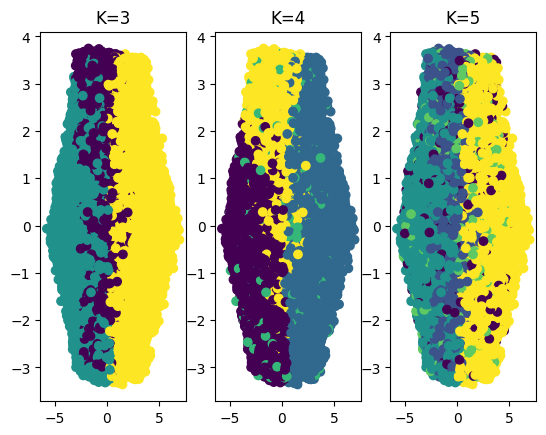

In [19]:
#k=3,4,5 cluster visulization
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Plot the clusters for K=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
cluster_labels = kmeans.predict(X_test)
ax1.scatter(X_test['PC1'], X_test['PC2'], c=cluster_labels)
ax1.set_title('K=3')

# Plot the clusters for K=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
cluster_labels = kmeans.predict(X_test)
ax2.scatter(X_test['PC1'], X_test['PC2'], c=cluster_labels)
ax2.set_title('K=4')

# Plot the clusters for K=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
cluster_labels = kmeans.predict(X_test)
ax3.scatter(X_test['PC1'], X_test['PC2'], c=cluster_labels)
ax3.set_title('K=5')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

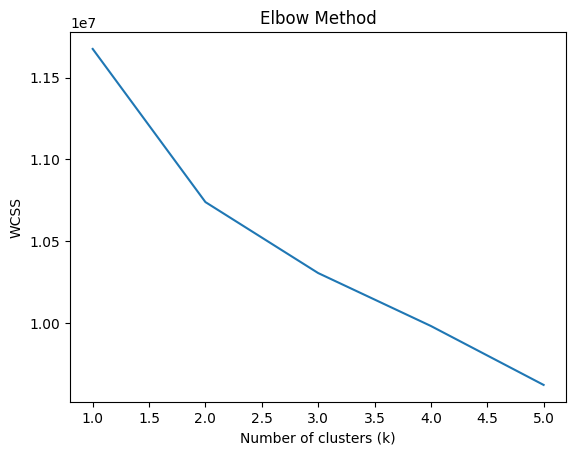

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.5431998934510446


In [20]:
# Optimal K Value is determined using either trial and error ranging from (1 to 5) or techniques like elbow plot.


# Elbow method to determine optimal k value

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate inertia for different k values
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the inertia for each k value
plt.plot(range(1, 6), inertia)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Choose the k value with the lowest inertia
optimal_k = 2

# Create a KMeans object with the optimal k value
kmeans = KMeans(n_clusters=optimal_k)

# Fit the KMeans object to the data
kmeans.fit(X_train)

# Predict the cluster labels for the test data
cluster_labels = kmeans.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, cluster_labels)

# Print the accuracy score
print(f"Accuracy: {accuracy}")




2.DBSCAN technique
  

In [ ]:


from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm

# Create a DBSCAN object with eps=2 and min_samples=500
dbscan = DBSCAN(eps=2, min_samples=500)

# Fit the DBSCAN object to the data
dbscan.fit(X_train)

# Predict the cluster labels for the test data
cluster_labels = dbscan.predict(X_test)

# Plot the clusters
plt.scatter(X_test['PC1'], X_test['PC2'], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show()

# Calculate the accuracy score
accuracy = accuracy_score(y_test, cluster_labels)

# Print the accuracy score
print(f"Accuracy: {accuracy}")

# Choose the optimal eps and min_samples values using techniques like grid search or silhouette analysis.


# Grid search to determine optimal eps and min_samples values

from sklearn.model_selection import GridSearchCV

# Define a grid of values for eps and min_samples
param_grid = {'eps': [0.1, 0.2, 0.3, 0.4, 0.5], 'min_samples': [50, 100, 150, 200]}

# Create a DBSCAN object
dbscan = DBSCAN()

# Create a GridSearchCV object
grid_search = GridSearchCV(dbscan, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")

# Create a DBSCAN object with the best parameters
dbscan = DBSCAN(**best_params)

# Fit the DBSCAN object to the data
dbscan.fit(X_train)

# Predict the cluster labels for the test data
cluster_labels = dbscan.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, cluster_labels)

# Print the accuracy score
print(f"Accuracy: {accuracy}")
